In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('insurance.csv')

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


We need to heck if any missing values are present in the dataframe

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Univariate distributions

<Axes: xlabel='age', ylabel='Count'>

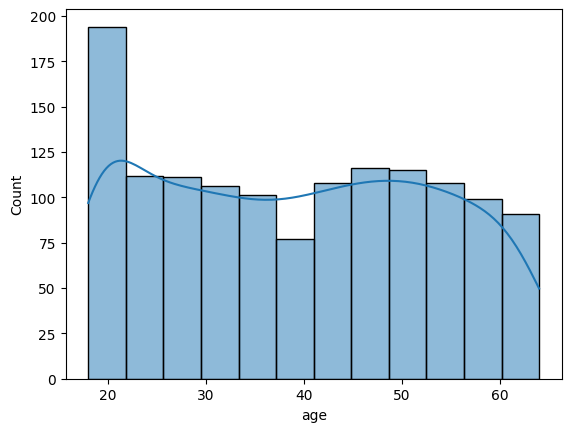

In [ ]:
sns.histplot(df['age'], kde=True)

<Axes: xlabel='bmi', ylabel='Count'>

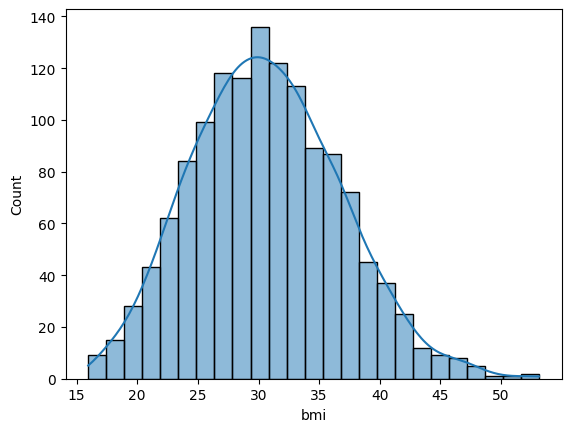

In [ ]:
sns.histplot(df['bmi'], kde=True)

<Axes: xlabel='charges', ylabel='Count'>

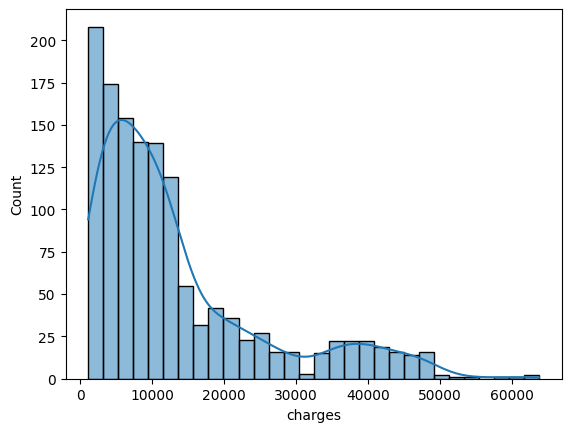

In [ ]:
sns.histplot(df['charges'], kde=True)

<Axes: xlabel='children', ylabel='Count'>

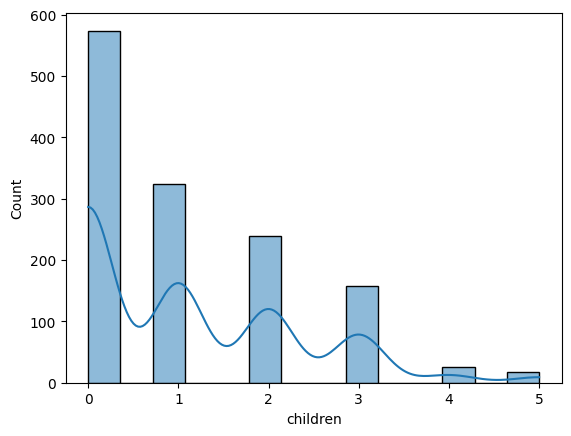

In [ ]:
sns.histplot(df['children'], kde=True)

Bivariate distributions

<Axes: xlabel='age', ylabel='charges'>

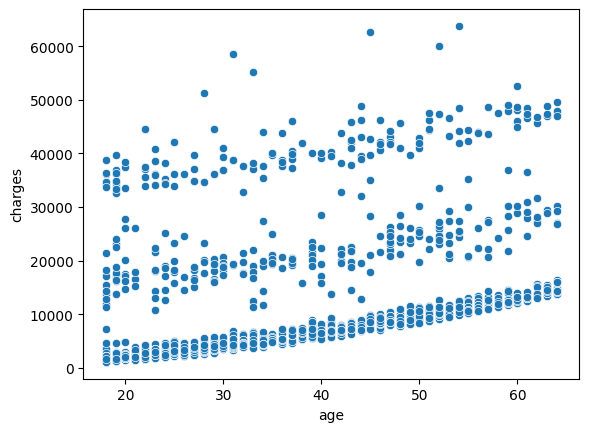

In [ ]:
sns.scatterplot(x='age', y='charges', data=df)

<Axes: xlabel='bmi', ylabel='charges'>

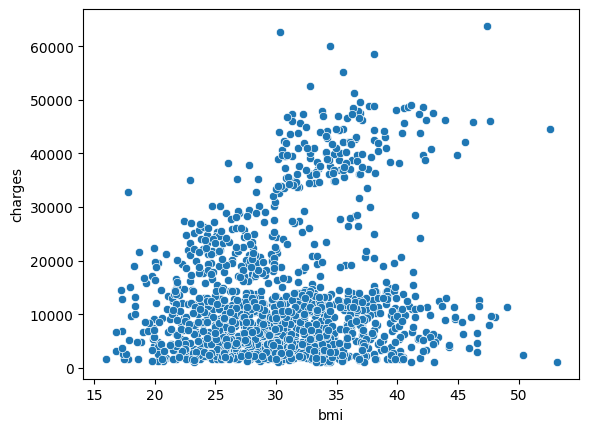

In [ ]:
sns.scatterplot(x='bmi', y='charges', data=df)

We need to first convert the categorical features to numeric features

In [ ]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
label_encoder = LabelEncoder()
df['sex']=label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


It has mapped

*   'sex' column as:
1.   male : 1
2.   female : 0

*   'smoker' column as:
1.   yes : 1
2.   no : 0

*   'region' column as:
1.   southwest: 3
2.   southeast: 2
3.   northeast: 0
4.   northwest: 1

In [ ]:
# Saving the cleaned and prepared dataset
df.to_csv('prepared_insurance_data.csv', index=False)


**Model** **Training**

In [ ]:
x = df.drop(columns = 'charges')
y= df['charges']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFE

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
c= linear_regressor.intercept_
m = linear_regressor.coef_
c

-11827.733141795718

In [ ]:
m

array([  256.5772619 ,   -49.39232379,   329.02381564,   479.08499828,
       23400.28378787,  -276.31576201])

In [ ]:
y_pred= linear_regressor.predict(X_test)

In [ ]:
r_squared=r2_score(y_test, y_pred)

In [ ]:
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print(f"R²: {r_squared}, Adjusted R²: {adjusted_r2}")

R²: 0.7911113876316933, Adjusted R²: 0.7879383960514152


In [ ]:
import statsmodels.api as sm

In [ ]:
X = sm.add_constant(x)

In [ ]:
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.866
Model:                            OLS   Adj. R-squared (uncentered):              0.866
Method:                 Least Squares   F-statistic:                              1005.
Date:                Sun, 20 Oct 2024   Prob (F-statistic):                        0.00
Time:                        06:12:49   Log-Likelihood:                         -9545.6
No. Observations:                 936   AIC:                                  1.910e+04
Df Residuals:                     930   BIC:                                  1.913e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
def backward_elimination(X, y, significance_level=0.05):
    num_vars = X.shape[1]
    for i in range(num_vars):
        model = sm.OLS(y, X).fit()
        max_p_value = max(model.pvalues)
        if max_p_value > significance_level:
            excluded_feature = model.pvalues.idxmax()
            print(f"Dropping {excluded_feature} with p-value {max_p_value}")
            X = X.drop(columns=[excluded_feature])
        else:
            break
    return model, X.columns
final_model, selected_features = backward_elimination(X_train, y_train)
print(f"Selected Features: {selected_features}")


Dropping sex with p-value 0.11777408199063913
Dropping children with p-value 0.112596890032789
Selected Features: Index(['age', 'bmi', 'smoker', 'region'], dtype='object')


In [ ]:
X_train_reduced = X_train[selected_features]
X_test_reduced = X_test[selected_features]
final_model = sm.OLS(y_train, X_train_reduced).fit()
print(final_model.summary())


                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.866
Model:                            OLS   Adj. R-squared (uncentered):              0.865
Method:                 Least Squares   F-statistic:                              1502.
Date:                Sun, 20 Oct 2024   Prob (F-statistic):                        0.00
Time:                        06:14:28   Log-Likelihood:                         -9548.1
No. Observations:                 936   AIC:                                  1.910e+04
Df Residuals:                     932   BIC:                                  1.912e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
y_pred = final_model.predict(X_test_reduced)
n = len(y_test)
p = X_test_reduced.shape[1]
r_squared = final_model.rsquared
adjusted_r2 = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

print(f"Adjusted R²: {adjusted_r2}")


Adjusted R²: 0.8643189290404012


In [ ]:
coefficients = model.params
print(coefficients)

const    -11477.871600
age         259.229365
bmi         329.161143
smoker    23417.803218
region     -255.993782
dtype: float64


In [ ]:
X_train_reduced = sm.add_constant(X_train[selected_features])  # Add constant for intercept
model = sm.OLS(y_train, X_train_reduced).fit()
y_train_pred = model.predict(X_train_reduced)
residuals = y_train - y_train_pred


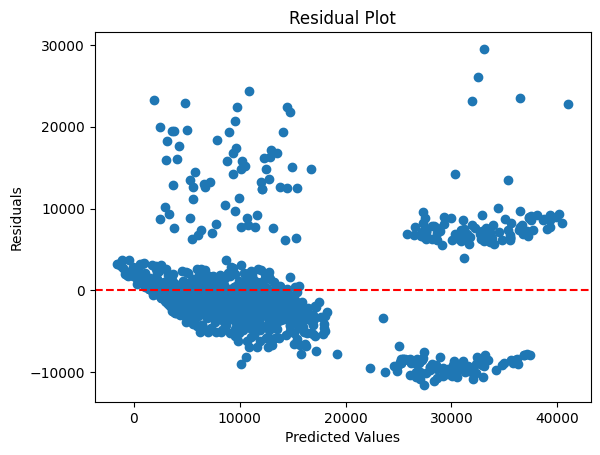

In [ ]:
plt.scatter(y_train_pred, residuals)
plt.axhline(0, color='red', linestyle='--')  # Line at zero residuals
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [ ]:
residuals = y_train - y_train_pred

# Number of data points (n) and predictors (p)
n = len(y_train)
p = X_train_reduced.shape[1] - 1  # subtract 1 for the intercept

# Calculate RSE
RSS = np.sum(residuals**2)  # Residual sum of squares
RSE = np.sqrt(RSS / (n - p - 1))

print(f'Residual Standard Error (RSE): {RSE}')

Residual Standard Error (RSE): 6205.354274829155
